In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("all_data.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [26]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [27]:
df.columns = ['country', 'year', 'life_expectancy', 'gdp']

In [28]:
df.describe()

,year,life_expectancy,gdp
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [29]:
df.country.nunique()

6

In [30]:
print("The average life expectancy per country is")
print(df.groupby('country').life_expectancy.mean())
print("The average life expectancy per year is")
print(df.groupby('year').life_expectancy.mean())
print("The average gdp per country is")
print(df.groupby('country').gdp.mean())

The average life expectancy per country is
country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: life_expectancy, dtype: float64
The average life expectancy per year is
year
2000    70.766667
2001    70.833333
2002    70.950000
2003    71.033333
2004    71.300000
2005    71.483333
2006    71.950000
2007    72.300000
2008    72.666667
2009    73.066667
2010    73.483333
2011    74.200000
2012    74.600000
2013    74.966667
2014    75.316667
2015    75.716667
Name: life_expectancy, dtype: float64
The average gdp per country is
country
Chile                       1.697888e+11
China                       4.957714e+12
Germany                     3.094776e+12
Mexico                      9.766506e+11
United States of America    1.407500e+13
Zimbabwe                    9.062580e+09
Name: gdp, dtype: float64


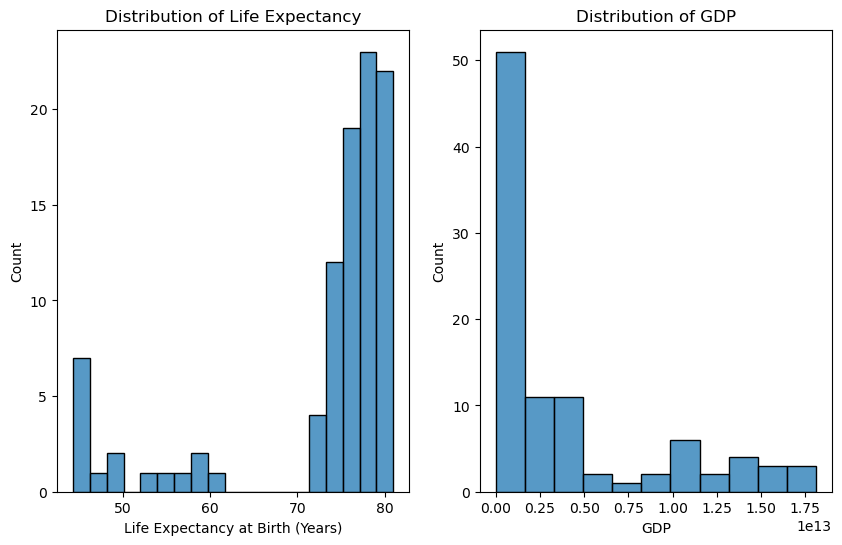

<Figure size 640x480 with 0 Axes>

In [31]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.histplot(x='life_expectancy', data=df)
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy at Birth (Years)")

plt.subplot(1,2,2)
sns.histplot(x='gdp', data=df)
plt.title("Distribution of GDP")
plt.xlabel("GDP")
plt.show()
plt.clf()

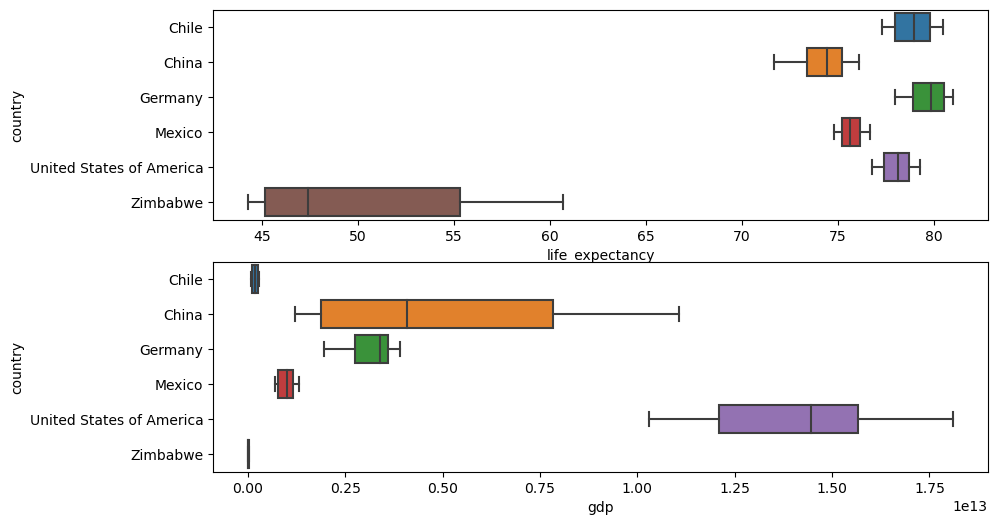

<Figure size 640x480 with 0 Axes>

In [32]:
plt.figure(figsize = (10,6))
plt.subplot(2,1,1)
sns.boxplot(x='life_expectancy', data=df, y='country')
plt.subplot(2,1,2)
sns.boxplot(x='gdp', data=df, y='country')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()
plt.clf()

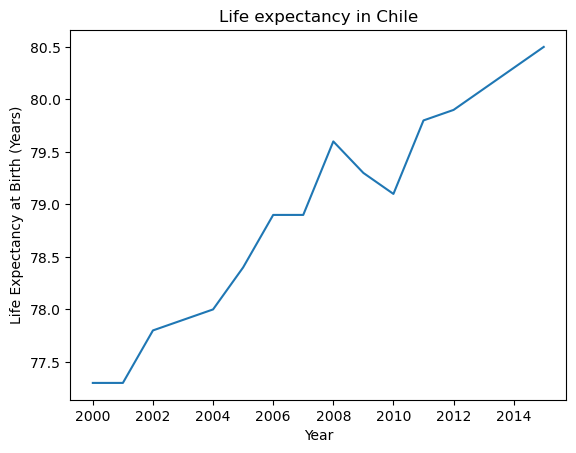

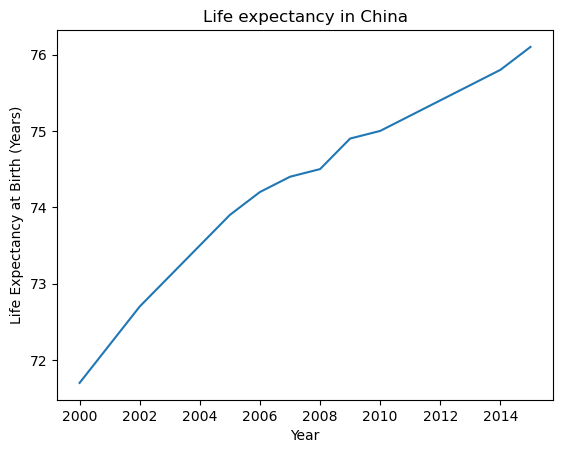

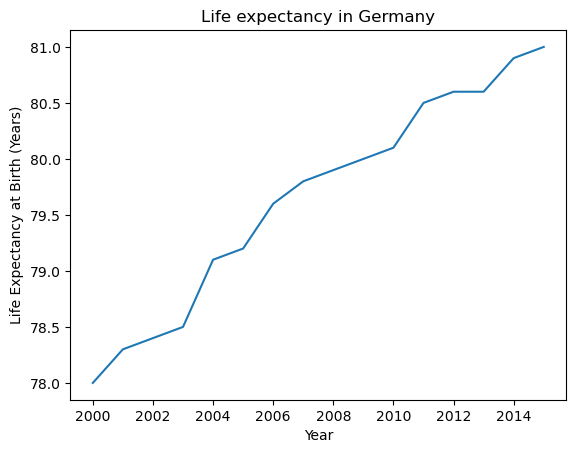

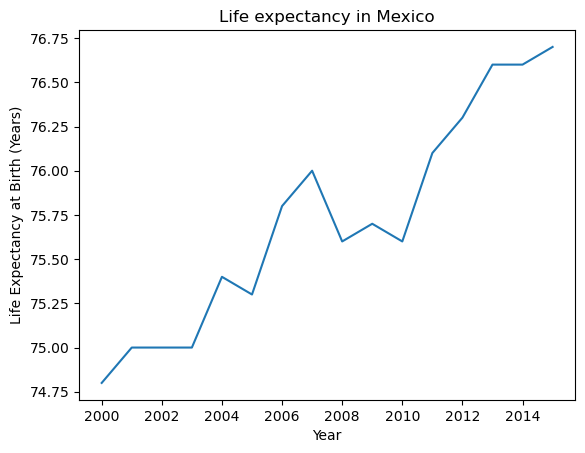

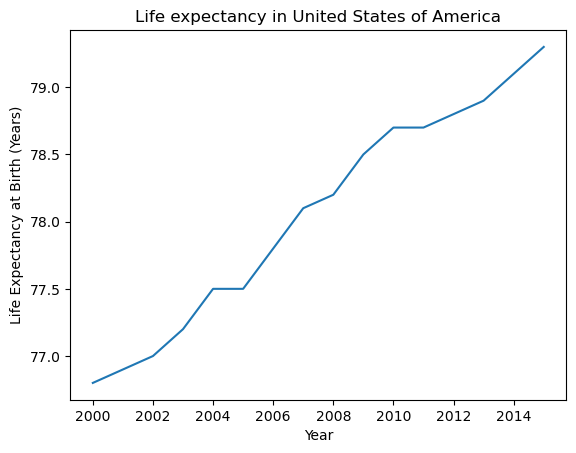

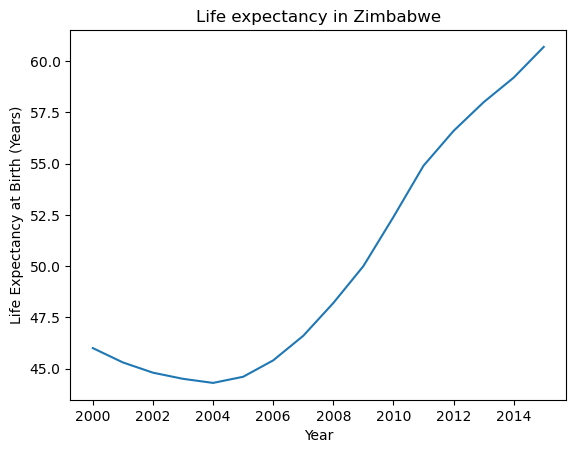

<Figure size 640x480 with 0 Axes>

In [33]:
for country in df.country.unique():
    country_df = df[df.country == country]
    sns.lineplot(x='year', y='life_expectancy', data = country_df)
    plt.title("Life expectancy in " + country)
    plt.ylabel("Life Expectancy at Birth (Years)")
    plt.xlabel("Year")
    plt.show()
    plt.clf()

Zimbabwe has both a low GDP and low life expectancy, therefore it makes it difficult to view details in trends due to the extended limits of the scale. It will be analyzed separately from other countries

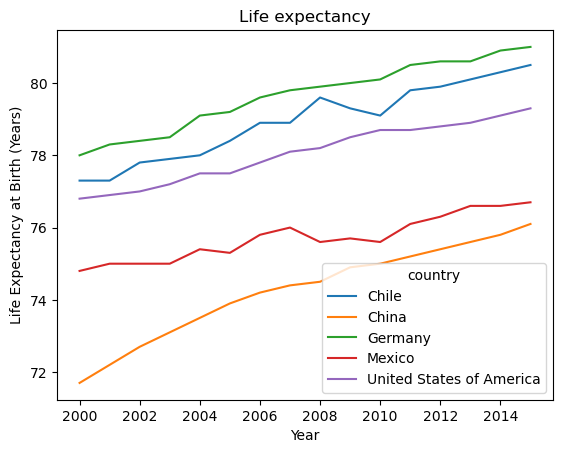

<Figure size 640x480 with 0 Axes>

In [34]:
not_zimbabwe = df[df.country != 'Zimbabwe']
sns.lineplot(x='year', y='life_expectancy', data=not_zimbabwe, hue='country')
plt.title("Life expectancy")
plt.ylabel("Life Expectancy at Birth (Years)")
plt.xlabel("Year")
plt.show()
plt.clf()

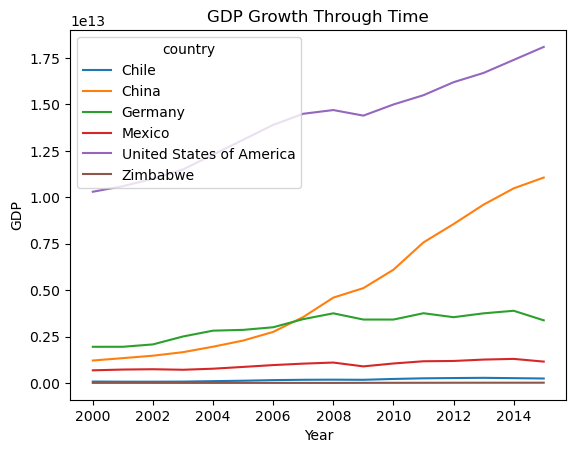

<Figure size 640x480 with 0 Axes>

In [35]:
sns.lineplot(x='year', y='gdp', data=df, hue='country')
plt.title("GDP Growth Through Time")
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()
plt.clf()

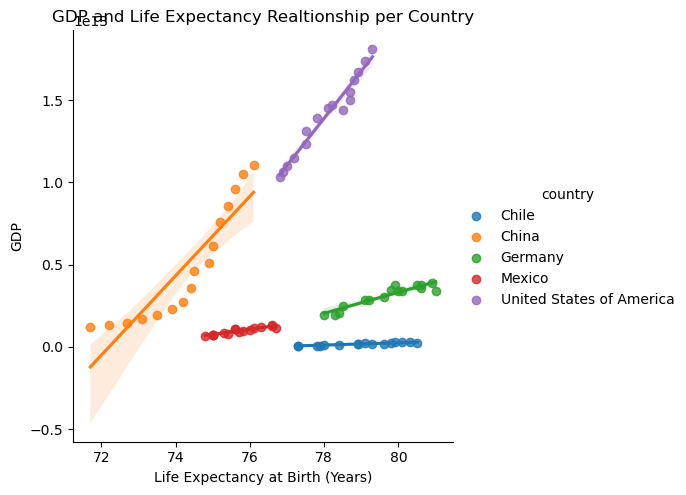

<Figure size 640x480 with 0 Axes>

In [36]:
sns.lmplot(x='life_expectancy', y='gdp', data = not_zimbabwe, hue='country')
plt.title("GDP and Life Expectancy Realtionship per Country")
plt.ylabel("GDP")
plt.xlabel("Life Expectancy at Birth (Years)")
plt.show()
plt.clf()

In [41]:
corr_matrix = df.corr()
corr_matrix["life_expectancy"]

year               0.155050
life_expectancy    1.000000
gdp                0.343207
Name: life_expectancy, dtype: float64

Calculating the correlation parameter for all data, there doesn't seem to be a strong correlation, except when countries are looked at separately

In [37]:
for country in df.country.unique():
    country_df = df[df.country == country]
    country_corr_matrix = country_df.corr()
    print("Correlation matrix for " + country )
    print(country_corr_matrix['life_expectancy'])
    country_df.name = country


Correlation matrix for Chile
year               0.980543
life_expectancy    1.000000
gdp                0.949877
Name: life_expectancy, dtype: float64
Correlation matrix for China
year               0.982734
life_expectancy    1.000000
gdp                0.908526
Name: life_expectancy, dtype: float64
Correlation matrix for Germany
year               0.987377
life_expectancy    1.000000
gdp                0.932699
Name: life_expectancy, dtype: float64
Correlation matrix for Mexico
year               0.950451
life_expectancy    1.000000
gdp                0.932238
Name: life_expectancy, dtype: float64
Correlation matrix for United States of America
year               0.992312
life_expectancy    1.000000
gdp                0.981709
Name: life_expectancy, dtype: float64
Correlation matrix for Zimbabwe
year               0.923924
life_expectancy    1.000000
gdp                0.966200
Name: life_expectancy, dtype: float64


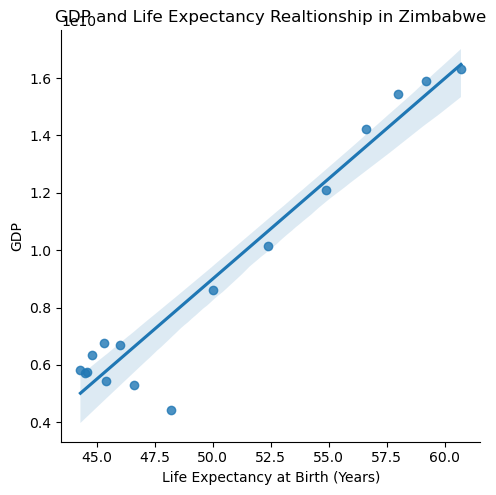

<Figure size 640x480 with 0 Axes>

In [38]:
sns.lmplot(x='life_expectancy', y='gdp', data = df[df.country == "Zimbabwe"])
plt.title("GDP and Life Expectancy Realtionship in Zimbabwe")
plt.ylabel("GDP")
plt.xlabel("Life Expectancy at Birth (Years)")
plt.show()
plt.clf()

# Conclusions
Life expectancy is poorly corrrelated to GDP in a general scope. However, GDP growth is strongly correlated to to life expectancy growth. 

Distribution of GDP shows a heavy tail indicating that there are fewer instances of GDP being higher than 0.5e13. The graphs showing GDP further support this by showing China and United States having more GDP than the resto of the countries.

China and United States had the greatest GDP growth over the period from 2000 to 2015.

Life Expectancy grew over time at a similar rate for every country.

2007 and 2008 were years of life expectancy decline for Mexico and Chile, latin american countries with low relatively low GDP.

Zimbabwe has had the lowest GDP and the lowest Life Expectancy from 2000 to 2015.